In [1]:
import pandas as pd
import random
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
aa_counter = {
    'A' : [],
    'U' : [],
    'G' : [],
    'C' : []
}

In [3]:
ref_data = pd.read_csv('../data/U_ideal_table.csv', index_col=0)

C:\Users\voron\AppData\Local\Temp\ipykernel_34736\1864407084.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ref_data = pd.read_csv('../data/U_ideal_table.csv', index_col=0)


In [4]:
ref_data = ref_data[ref_data['GenType'] == 'translated']

In [5]:
ref_data = ref_data[['CodonNumber', 'RefCodon']].drop_duplicates()

In [6]:
ref_data = ref_data[~(ref_data['RefCodon'].isin(['UGA', 'UAA', 'UAG']))]

In [7]:
ref_codon_list = ref_data['RefCodon'].to_list()

In [8]:
mutations = pd.read_csv('../data/All_mutation_information.csv.gz')
mutations = mutations[mutations['(SBS) is coding'].isin([True, 'TRUE', 'TRUE, TRUE'])]

C:\Users\voron\AppData\Local\Temp\ipykernel_34736\1688172839.py:1: DtypeWarning: Columns (13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  mutations = pd.read_csv('../data/All_mutation_information.csv.gz')


In [9]:
all_df = mutations[mutations['base(s) in status 1'].isin(['A', 'T', 'G', 'C']) & mutations['base(s) in status 2'].isin(['A', 'T', 'G', 'C'])]

all_df['aa_from'] = all_df['(SBS) AA change'].str.split(" ").str[1].str[0]
all_df['aa_to'] = all_df['(SBS) AA change'].str.split(" ").str[1].str[0]
all_df = all_df.reset_index(drop=True)
all_df['counter'] = all_df.index
all_df['from_to_nuc'] = all_df['base(s) in status 1'] + '>' + all_df['base(s) in status 2']
data = all_df[['from_to_nuc', 'counter']].groupby(['from_to_nuc'], as_index=False).count()
n_mut = int(sum(data['counter']))
max_mut = int(max(data['counter']))
data['counter'] = data['counter']/n_mut

In [10]:
data['from_nuc'] = data['from_to_nuc'].str.split(">").str[0]
data['to_nuc'] = data['from_to_nuc'].str.split(">").str[1]
data['to_nuc'] = data['to_nuc'].str.replace('T','U')
data['from_nuc'] = data['from_nuc'].str.replace('T','U')

In [11]:
ref_codon_list

['AUG',
 'GAG',
 'AGC',
 'CUU',
 'GUC',
 'CCU',
 'GGU',
 'UUC',
 'AAC',
 'GAG',
 'AAA',
 'ACA',
 'CAC',
 'GUC',
 'CAA',
 'CUC',
 'AGU',
 'UUG',
 'CCU',
 'GUU',
 'UUA',
 'CAG',
 'GUU',
 'CGC',
 'GAC',
 'GUG',
 'CUC',
 'GUA',
 'CGU',
 'GGC',
 'UUU',
 'GGA',
 'GAC',
 'UCC',
 'GUG',
 'GAG',
 'GAG',
 'GUC',
 'UUA',
 'UCA',
 'GAG',
 'GCA',
 'CGU',
 'CAA',
 'CAU',
 'CUU',
 'AAA',
 'GAU',
 'GGC',
 'ACU',
 'UGU',
 'GGC',
 'UUA',
 'GUA',
 'GAA',
 'GUU',
 'GAA',
 'AAA',
 'GGC',
 'GUU',
 'UUG',
 'CCU',
 'CAA',
 'CUU',
 'GAA',
 'CAG',
 'CCC',
 'UAU',
 'GUG',
 'UUC',
 'AUC',
 'AAA',
 'CGU',
 'UCG',
 'GAU',
 'GCU',
 'CGA',
 'ACU',
 'GCA',
 'CCU',
 'CAU',
 'GGU',
 'CAU',
 'GUU',
 'AUG',
 'GUU',
 'GAG',
 'CUG',
 'GUA',
 'GCA',
 'GAA',
 'CUC',
 'GAA',
 'GGC',
 'AUU',
 'CAG',
 'UAC',
 'GGU',
 'CGU',
 'AGU',
 'GGU',
 'GAG',
 'ACA',
 'CUU',
 'GGU',
 'GUC',
 'CUU',
 'GUC',
 'CCU',
 'CAU',
 'GUG',
 'GGC',
 'GAA',
 'AUA',
 'CCA',
 'GUG',
 'GCU',
 'UAC',
 'CGC',
 'AAG',
 'GUU',
 'CUU',
 'CUU',
 'CGU',
 'AAG',


In [12]:
def select_codon_number(codon_list):
    return random.choice(range(len(codon_list)))

In [19]:
def mutate_codon(codon_number):
    nuc_number = random.choice(range(len(codon_list[codon_number])))
    
    nuc_spec = data[data['from_nuc'] == codon_list[codon_number][nuc_number]]
    pop = nuc_spec['to_nuc'].to_list()
    pop.append(codon_list[codon_number][nuc_number])
    
    wei = nuc_spec['counter'].to_list()
    wei.append(1 - sum(wei))
    
    new_nuc = random.choices(pop, weights=wei)[0]
    
    new_codon = codon_list[codon_number][:nuc_number] + new_nuc + codon_list[codon_number][nuc_number + 1:]
    
    if new_codon in ['UGA', 'UAA', 'UAG']:
        new_codon = codon_list[codon_number]
        
    if new_codon == codon_list[codon_number]:
        count=0
    else:
        count=1
    
    codon_list[codon_number] = new_codon
    return count

In [20]:
def update_aa_dict(aa_counter, new_aa_counter):
    for key in aa_counter.keys():
        if key in new_aa_counter.keys():
            aa_counter[key].append(new_aa_counter[key])
        else:
            aa_counter[key].append(0)

In [26]:
ref_nuc_list = ''.join(ref_codon_list)

In [21]:
codon_list = ref_codon_list

num_generations = 10000
mut_in_gen = 100

num_mut = []

for gen in tqdm(range(num_generations)):
    new_dict = dict(Counter(''.join(codon_list)))
    
    update_aa_dict(aa_counter, new_dict)
    gen_mut_count=0
    for mut in range(mut_in_gen):
        codon_num_to_mut = select_codon_number(codon_list)
        
        mut_counter = mutate_codon(codon_num_to_mut)
        gen_mut_count+=mut_counter
    num_mut.append(gen_mut_count)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:37<00:00, 36.01it/s]


In [27]:
mutated_df = pd.DataFrame(aa_counter)
mutated_df = mutated_df / len(ref_nuc_list)

In [28]:
mutated_df

,A,U,G,C
0,0.298183,0.322210,0.196153,0.183455
1,0.298046,0.322586,0.196119,0.183249
2,0.298046,0.322860,0.196119,0.182976
3,0.298148,0.323202,0.195948,0.182702
4,0.298080,0.323476,0.195811,0.182633
...,...,...,...,...
9995,0.138310,0.651915,0.080090,0.129685
9996,0.138276,0.651675,0.080090,0.129959
9997,0.138241,0.651538,0.080056,0.130164
9998,0.138207,0.651299,0.080056,0.130438


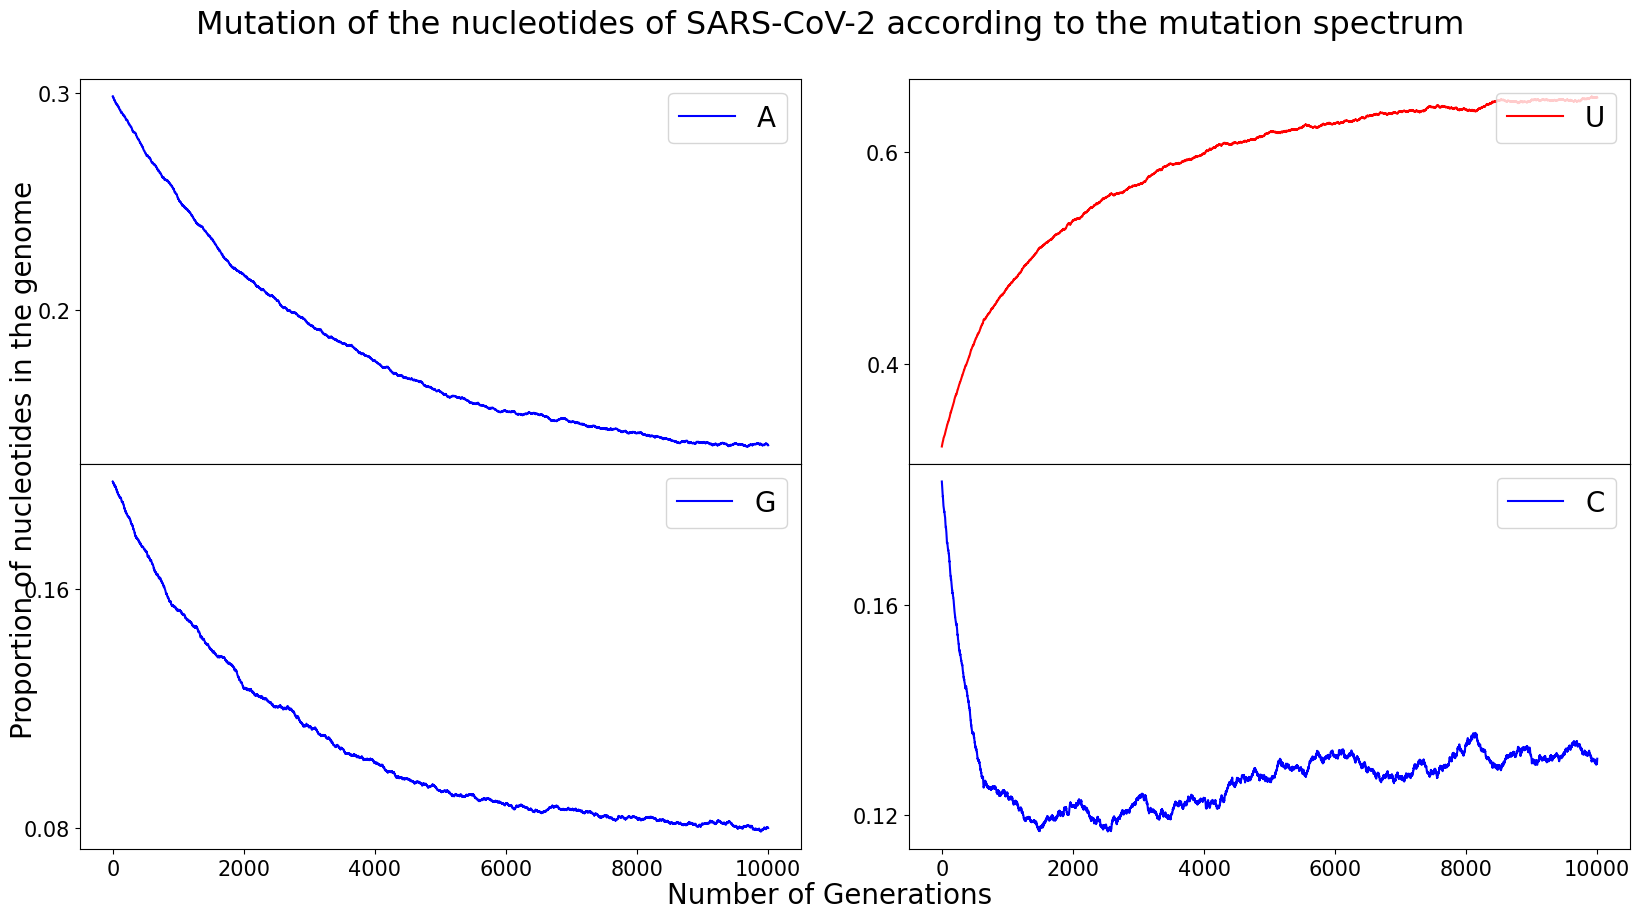

In [45]:

with PdfPages('../figures/mutation_of_nuc.pdf') as pdf:
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))
    
    axs[0][0].plot(mutated_df["A"], color='blue', label="A")
    axs[0][1].plot(mutated_df["U"], color='red', label="U")
    axs[1][0].plot(mutated_df["G"], color='blue', label="G")
    axs[1][1].plot(mutated_df["C"], color='blue', label="C")
    
    axs[0][0].legend(loc="upper right", fontsize=20)
    axs[0][0].yaxis.set_major_locator(plt.MaxNLocator(2))
    axs[0][1].legend(loc="upper right", fontsize=20)
    axs[0][1].yaxis.set_major_locator(plt.MaxNLocator(2))
    axs[1][0].legend(loc="upper right", fontsize=20)
    axs[1][0].yaxis.set_major_locator(plt.MaxNLocator(2))
    axs[1][1].legend(loc="upper right", fontsize=20)
    axs[1][1].yaxis.set_major_locator(plt.MaxNLocator(2))
        
    
    plt.subplots_adjust(hspace=0)
    plt.subplots_adjust(wspace=0.15)
        
    plt.grid(False)
    fig.supylabel("Proportion of nucleotides in the genome", x=0.09, size=20)
    fig.supxlabel("Number of Generations", y=0.05, size=20)
    fig.suptitle("Mutation of the nucleotides of SARS-CoV-2 according to the mutation spectrum", y=0.95, size=23)
    
    axs[0][0].yaxis.set_tick_params(labelsize=15)
    axs[0][1].yaxis.set_tick_params(labelsize=15)
    axs[1][0].yaxis.set_tick_params(labelsize=15)
    axs[1][1].yaxis.set_tick_params(labelsize=15)
    
    axs[1][0].xaxis.set_tick_params(labelsize=15)
    axs[1][1].xaxis.set_tick_params(labelsize=15)
    pdf.savefig(fig, bbox_inches='tight') 